# Simulation und Modellierung WS17/18 - Uebung 06

### Aufgabe 1: Erzeugung und Multiplikation von Vektoren und Matrizen

Die Ableitung einer Funktion $f(x)$ an einer Stelle $x_0$ kann mit Hilfe eines geeigneten Differenzenquotienten approximiert werden. Es gilt

$$
    \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h} = f'(x_0)
$$

- Definieren Sie eine `N`x`N` Matrix `D`, welche auf einen `N`x`1` Vektor `f` angewendet die symmetrische Differenz der Gitterpunkte $(Df)_i = f_{i+1}-f_{i-1}$ berechnet, wobei man periodische Randbedingungen $f_{i+N}=f_i$ annimmt. 
- berechnen Sie mit Hilfe dieser Matrix die erste und zweite Abbleitung der Funktion `f(x) = sin(x)` welche an `N` Gitterpunkten auf dem Intervall $[0,2\pi)$ gegeben sei.
- plotten Sie $f(x)$, $f'(x)$ und $f''(x)$ in ein Diagramm.

In [27]:
#Ausgabe der Plots im Notebook und laden von numpy und pylab (matplotlib+pyplot)
%matplotlib inline
import numpy as np 
from pylab import *

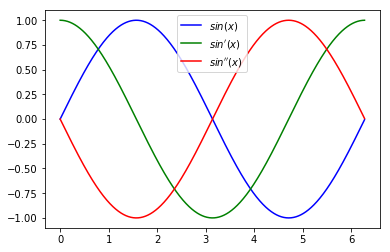

In [28]:
#define N, D, x, h, f, df  and d2f here

N=1000                                   #definiere N auf den Wert 1000


x = linspace(0,2*pi,N,endpoint=False)    #erstellt eine 1xN Matrix 'x' im Intervall von 0 bis 2pi mit 'N' Elementen.
                                         #die Endpunkte der Liste werden vernachlässigt.

f = sin(x)                               #definiere den Vektor 'f' als Sinusfunktion mit der Eigenschaften der Liste aus 'x'.


h=(2*pi)/N                               #allgemeiner: h=abs(x[1]-x[0])
                                         #definiere den Abstand zwischen Elementen 'x' der Größe des Intervalls durch die Menge
                                         #durch die Anzahle der Elemente in 'x'
        
D=np.eye(N,k=1)-np.eye(N,k=-1)           #erstellt eine Matrix 'D' der Größe NxN
                                         #erzeugt eine Diagonalle von einsen über der urdiagonallen
                                         #Subtrahiert eine Matrix mit diagonallen Einsen unter der Urdiagonalen.
                                         #daraus folgt eine Matrix mit Nullen auf der Urdiagonalen, mit Einsen über dieser und mit
                                         #minus Einsen unter der Urdiagnalen.
                
D[0,-1]=-1                               #das Element Reihe 0 und letzte Spalte wird auf -1 gesetzt
 
D[-1,0]=1                                #das Element letzten Reihe und Spalte 0 wird auf 1 gesetzt.
                                         #damit wird die periodische Randbedingungen vervollständigt.
D/= (2*h)                                #Teile die Matrix D durch 2*h um den Diffenezenquotienten zu vervollständigen

df = D.dot(f)                            #wende die Matrix auf den gegebenen Vektor an, um die erste Ableitung bei den Punkten zu berechnen.
d2f = D.dot(df)                          #wende die Matrix auf den gegebenen Vektor an, um die zweite Ableitung bei den Punkten zu berechnen.

plot(x,f,'b',label='$sin(x)$')
plot(x,df,'g',label='$sin\'(x)$')
plot(x,d2f,'r',label="$sin''(x)$")
legend()
show()

### Aufgabe 2 : Der getriebene, gedaempfte harm. Oszillator

Der getriebene, gedaempfte harmonische Oszillator genuegt der Differentialgleichung

$$
    \ddot x + 2\gamma \dot x + \omega_0^2 x = A \cos(t)
$$
z.B. mit $\gamma=0.1$, $\omega_0=1.0$ und $A=1.0$.
- Schreiben Sie eine Funktion `limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100)`, welche die lineare, inhomogene Differentialgleichung in `N` Zeitschritte ueber eine Periode der antreibenen Kraft diskretisiert und als lineares Gleichungssystem 
<br><br>
$$
    \frac{1}{4h^2}\textrm{D}^2\cdot \vec{x} + 2\gamma \frac{1}{2h}\textrm{D}\cdot \vec{x} + \omega_0^2 ~\mathbf{1}\cdot \vec{x} = A cos(\vec{t})
$$
loest. 

- Bestimmen und zeichnen Sie die Amplitude $B$ und die Phasenverschiebung $\varphi$ der Loesung $x = B \cos(t-\varphi)$ als Funktion von $\omega_0$. Hierfuer kann man die numpy Array Methode `x.argmax()` verwenden, welche den Index des maximalen Elements von `x` liefert.
- Zeichnen Sie die analytischen Loesungen
$$
\begin{eqnarray}
    B &=& \frac{A}{\sqrt{(\omega_0^2-1)^2+4\gamma^2}} \\
    \tan\varphi &=& \frac{-2\gamma}{\omega_0^2-1}
\end{eqnarray}
$$
ueber die von Ihnen numerisch gefundenen Loesungen als Funktion der Eigenfrequenz $\omega_0$ des harmonischen Oscillators. *Hinweis :* Die Methode `numpy.arctan2(y,x)` gibt den Winkel `alpha` mit `sin(alpha)=y` und `cos(alpha)=x` zurueck.

In [47]:
import numpy as np
def limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100) :
    """ 
    Bestimmt die Loesung der inhomogenen linearen Differentialgleichung
    d^2x/dt^2 + 2 gamma dx/dt + omega0^2 x = A cos(t)
    auf dem in N Punkte diskretisierten periodischen Zeitintervall [0,2pi)
    """
    
    #your code goes here
    t = linspace(0,2*np.pi,N,endpoint=False) #erstellt eine 1xN Matrix 't' im Intervall von 0 bis 2pi mit 'N' Elementen.
                                             #die Endpunkte der Liste werden vernachlässigt.
    
    h = abs(t[1]-t[0])                       #subbtrahiert das erste Element der Liste 't' vom Zweiten und bildet davon den absoluten Betrag
                                             #definiert den Betrag als 'h'
    
    D=np.eye(N,k=1) - np.eye(N,k=-1)         #erstellt eine Matrix 'D' der Größe NxN
                                             #erzeugt eine Diagonalle von einsen über der urdiagonallen
                                             #Subtrahiert eine Matrix mit diagonallen Einsen unter der Urdiagonalen.
                                             #daraus folgt eine Matrix mit Nullen auf der Urdiagonalen, mit Einsen über dieser und mit
                                             #minus Einsen unter der Urdiagnalen.
                    
    D[0,-1]=-1                               #das Element Reihe 0 und letzte Spalte wird auf -1 gesetzt
 
    D[-1,0]=1                                #das Element letzten Reihe und Spalte 0 wird auf 1 gesetzt.
                                             #damit wird die periodische Randbedingungen vervollständigt.
    
    LGS = 1/(4*h**2) * D.dot(D) + (2 * gamma * (1/(2*h))) * D + (omega0**2) * np.eye(N)   
    #berechnet den linken Teil der zweiten Gleichung ohne das 'x', welches gesucht ist
    # D.dot(D) multiplikation der Matrix mit sich selbst zwecks zweiter Ableitung                                                                                    
    # omega0 zum Quadrat mal Einheitsmatrix (np.eye(N)) um eine einheitsmatix mit omega0**2 in der Urdiagonallen zu erhalten, bevor sie mir der Matrix D multipliziert werden.
    
    b = A * cos(t)                           #berechnet den rechten Term der zweiten Gleichung und definiert diesen als 'b'
    
    x = np.linalg.solve(LGS,b)               #berechnet aus der LGS und b den gesuchten Vektor 'x'
    
    plot(t,x)                                #plottet 't' gegen 'x'
    return x                                 #gibt 'x' als Ergebnis der Funktion aus


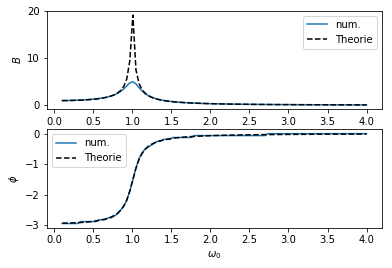

In [64]:
L=100
omega0 = np.linspace(0.1,4,L)
B = np.zeros(L)
phi = np.zeros(L)

# bestimme B und phi numerisch fuer alle Werte in omega0
# definiere die theoretischen Werte Bth und phith

for n in range(0,L):                                                #in den darunterstehenden Anweisungen wird 'n' von 0 bis L  angewendet 
    
    x = limit_cycle(omega0 = omega0[n],N = L)                       #erzeugt eine 1xN Matrix 'x', welche mit den Werten der Funktion 'limit_cycle' gefüllt ist
    
    B[n] = x[x.argmax()]                                            #gibt den Maximalwert von 'B' an der Stelle 'n' aus
    
    phi[n] = -x.argmax() * ((2 * pi) / L)                           #gibt den Maximalwert von 'phi' an der Stelle 'n' aus 
                                                                    #'-x', da die Funktion nach unten verläuft
                                                                    #(2*pi)/L, da 'phi' ein Winkel ist und mit dem Bogenmaß gearbeitet wird

Bth = np.zeros(L)                                                   #erzeugt eine NxN Matrix 'Bth', gefüllt mit Nullen

phith = np.zeros(L)                                                 #erzeugt eine NxN Matrix 'phith', gefüllt mit Nullen

for n in range(0,L):                                                #in den darunterstehenden Anweisungen wird 'n' von 0 bis L  angewendet 
    
    Bth[n] = A / (sqrt((omega0[n] ** 2 - 1) ** 2) + 4 * gamma ** 2) #berechnet den theoretischen Wert von 'B' nach der dritten Gleichung
                                                                    #ersetzt die Nullen in der Matrix durch die berechneten Werte
   
    phith[n] = np.arctan2(-2 * gamma,omega0[n] ** 2 - 1)            #berechnet den theoretischen Wert von 'phi' nach der vierten Gleichung
                                                                    #ersetzt die Nullen in der Matrix durch die berechneten Werte
    

subplot(2,1,1)
plot(omega0,B,label='num.')
plot(omega0,Bth,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$B$')


subplot(2,1,2)
plot(omega0,phi,label='num.')
plot(omega0,phith,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$\phi$')
show()